In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,min_slary,max_slary,avg_slary,company_txt,job_state,age,python_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$65K-$108K (Glassdoor est.),"HPOne, named CT Magazine's 2018 Great Places t...",3.6,HPOne\n3.6,"Trumbull, CT",501 to 1000 Employees,2006,Company - Private,Insurance Carriers,...,65,108,86.5,HPOne\n,CT,14,1,0,0,1
1,Senior Data Scientist,$98K-$158K (Glassdoor est.),This position is available for remote employme...,4.3,Pluralsight\n4.3,"Draper, UT",1001 to 5000 Employees,2004,Company - Public,Computer Hardware & Software,...,98,158,128.0,Pluralsight\n,UT,16,1,1,0,1
2,Data Scientist,$76K-$127K (Glassdoor est.),Description\n\nJob Description:\n\nLeidos has ...,3.7,Leidos\n3.7,"McLean, VA",10000+ Employees,1969,Company - Public,Aerospace & Defense,...,76,127,101.5,Leidos\n,VA,51,1,0,1,1
3,Senior Scientist I,$64K-$139K (Glassdoor est.),Job Description Summary\nThe successful candid...,3.7,BD\n3.7,"San Diego, CA",10000+ Employees,1897,Company - Public,Health Care Products Manufacturing,...,64,139,101.5,BD\n,CA,123,0,0,0,0
4,Marketing Data Analyst,$30K-$58K (Glassdoor est.),Overview:\n\nThe Marketing Data Analyst is res...,4.4,C Spire\n4.4,"Ridgeland, MS",1001 to 5000 Employees,1988,Company - Private,Telecommunications Services,...,30,58,44.0,C Spire\n,MS,32,1,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_slary', 'max_slary', 'avg_slary',
       'company_txt', 'job_state', 'age', 'python_yn', 'spark_yn', 'aws_yn',
       'excel_yn'],
      dtype='object')

In [5]:

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [6]:
## Job title and seniority 
df['job_simp']= df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    471
na                187
analyst           152
data engineer     110
mle                43
director           18
manager            14
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df.seniority.value_counts()

na        794
senior    201
Name: seniority, dtype: int64

In [10]:
##  Fix some states

df['job_state']= df.job_state.apply (lambda x: x.strip () if x.strip().lower() != 'california' else 'CA')
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'maryland' else 'MD')
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'virginia' else 'VA')
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'florida' else 'FL')
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'north carolina' else 'NC')
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'oregon' else 'OR')
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'puerto rico' else 'PR')
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'united states' else 'na')
#df.job_state.value_counts()

In [11]:
##  Job description length 
df['desc_len'] = df['Job Description'].apply (lambda x: len (x) )

In [12]:
#remove new line from company_txt
df['company_txt']= df.company_txt.apply(lambda x: x.replace('\n',''))

In [13]:
df.describe()

,Rating,Founded,min_slary,max_slary,avg_slary,age,python_yn,spark_yn,aws_yn,excel_yn,desc_len
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,3.537688,1679.211055,82.484422,142.466332,112.475377,31.900503,0.622111,0.197990,0.270352,0.482412,4033.997990
std,1.297729,714.749308,32.690865,53.509149,42.193637,38.980457,0.485104,0.398685,0.444365,0.499942,1647.062436
min,-1.000000,-1.000000,27.000000,56.000000,42.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,580.000000
25%,3.400000,1937.000000,55.000000,97.000000,74.500000,6.000000,0.000000,0.000000,0.000000,0.000000,2952.000000
50%,3.800000,1990.000000,78.000000,122.000000,100.000000,19.000000,1.000000,0.000000,0.000000,0.000000,3833.000000
75%,4.100000,2007.000000,110.000000,183.000000,153.000000,42.000000,1.000000,0.000000,1.000000,1.000000,4971.500000
max,5.000000,2019.000000,145.000000,244.000000,188.000000,231.000000,1.000000,1.000000,1.000000,1.000000,12250.000000


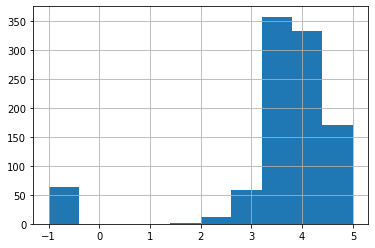

In [14]:
df.Rating.hist()

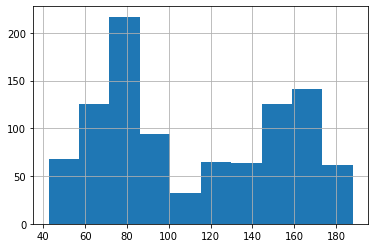

In [15]:
df.avg_slary.hist()

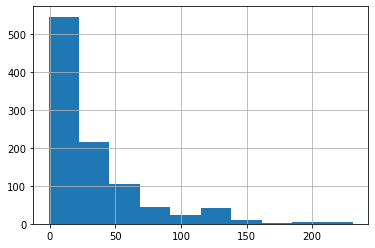

In [16]:
df.age.hist()

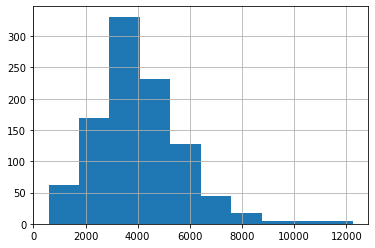

In [17]:
df.desc_len.hist()

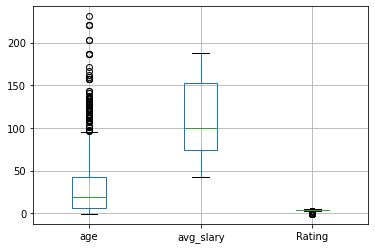

In [18]:
df.boxplot(column=['age','avg_slary','Rating'])

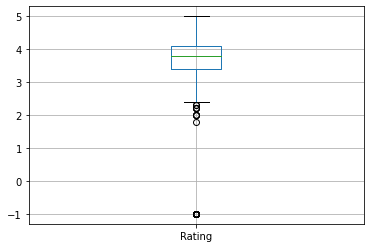

In [19]:
df.boxplot(column='Rating')

In [20]:
#correlations
df[['age','avg_slary','Rating','desc_len']].corr()

,age,avg_slary,Rating,desc_len
age,1.000000,0.006745,0.146590,0.153853
avg_slary,0.006745,1.000000,-0.002027,0.027387
Rating,0.146590,-0.002027,1.000000,0.028255
desc_len,0.153853,0.027387,0.028255,1.000000


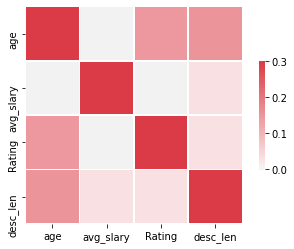

In [21]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_slary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
df_cat=df[['Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt','job_state','python_yn', 'spark_yn', 'aws_yn',
       'excel_yn','job_simp','seniority']]

Graph for Location: total= 281


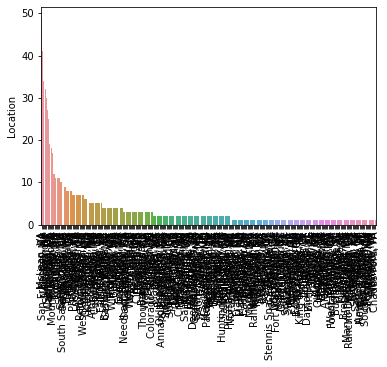

Graph for Size: total= 9


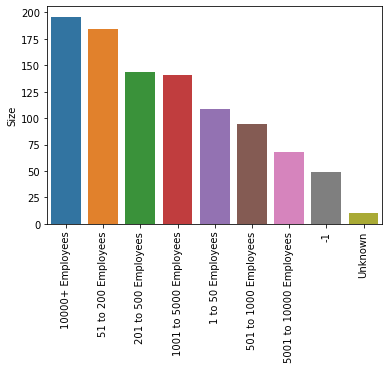

Graph for Type of ownership: total= 12


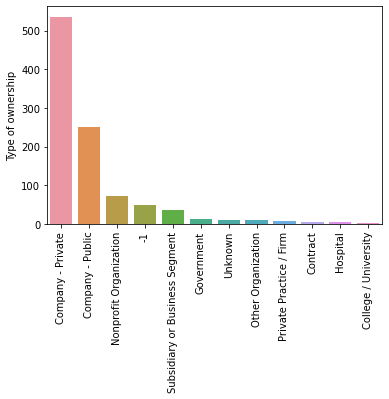

Graph for Industry: total= 67


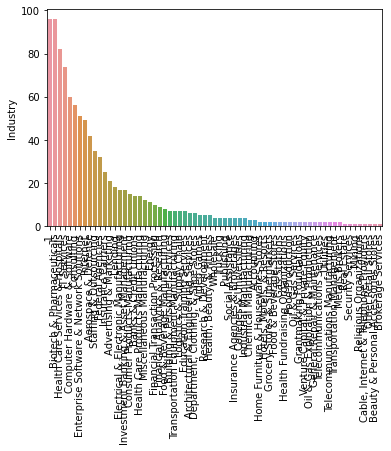

Graph for Sector: total= 24


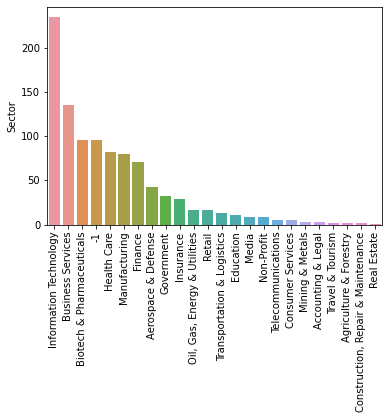

Graph for Revenue: total= 14


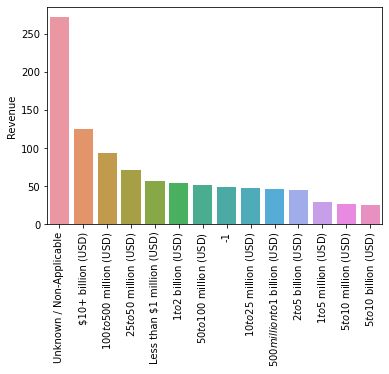

Graph for company_txt: total= 536


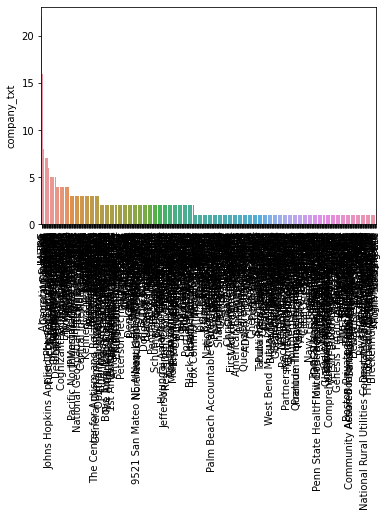

Graph for job_state: total= 48


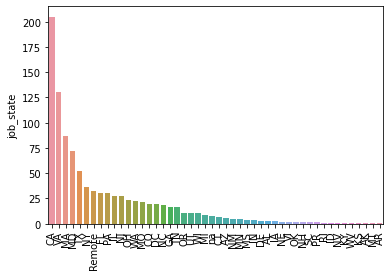

Graph for python_yn: total= 2


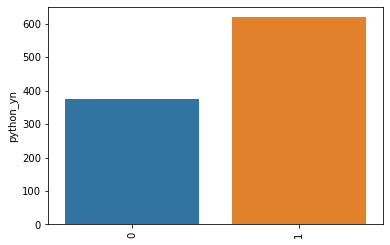

Graph for spark_yn: total= 2


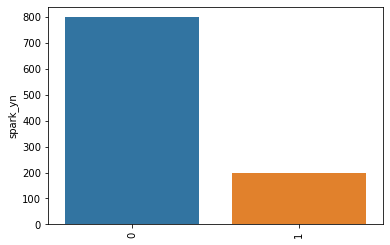

Graph for aws_yn: total= 2


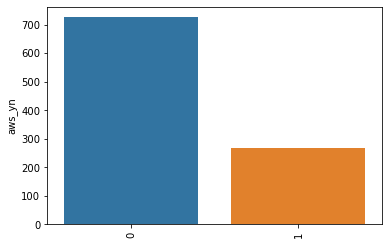

Graph for excel_yn: total= 2


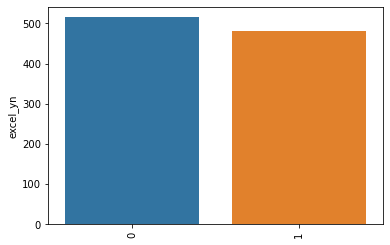

Graph for job_simp: total= 7


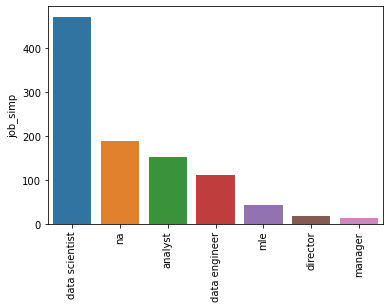

Graph for seniority: total= 2


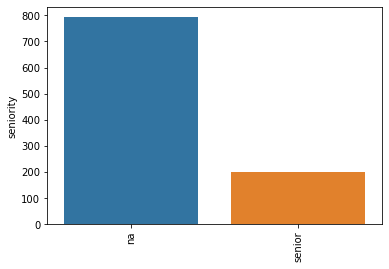

In [23]:
for i in df_cat.columns:
    cat_num= df_cat[i].value_counts()
    print ("Graph for %s: total= %d" %(i,len(cat_num)))
    chart= sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(  chart.get_xticklabels() ,rotation=90)
    plt.show()

Graph for Location: total= 20


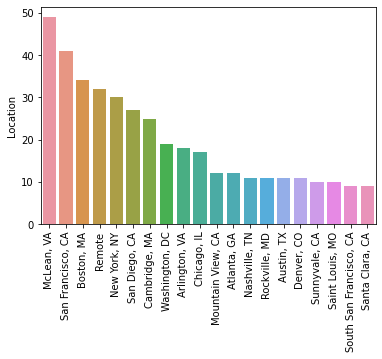

Graph for company_txt: total= 20


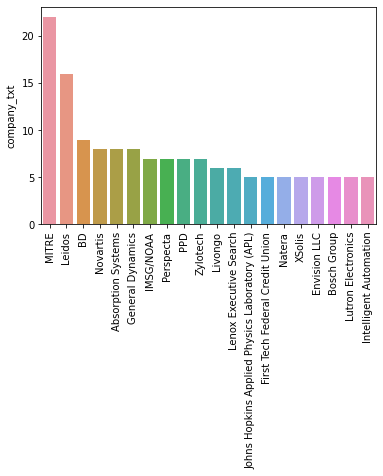

In [24]:
for i in df_cat[['Location','company_txt']].columns:
    cat_num= df_cat[i].value_counts()[:20]
    print ("Graph for %s: total= %d" %(i,len(cat_num)))
    chart= sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(  chart.get_xticklabels() ,rotation=90)
    plt.show()

In [25]:
pd.pivot_table(df,index=['job_simp','seniority'],values='avg_slary')

avg_slary
job_simp       seniority            
analyst        na         107.981481
               senior      89.420455
data engineer  na         115.230337
               senior     119.166667
data scientist na         118.695274
               senior     104.340580
director       na         103.071429
               senior     111.636364
manager        na         129.535714
mle            na         103.100000
               senior     138.500000
na             na         106.032374
               senior     113.031250

In [26]:
pd.pivot_table(df,index='job_state',values='avg_slary').sort_values('avg_slary', ascending=False)

,avg_slary
job_state,
WV,188.000000
DE,165.000000
VI,154.250000
AK,148.000000
KS,148.000000
MI,144.555556
PR,144.000000
MT,144.000000
AL,140.500000


In [27]:
pd.pivot_table(df,index=['job_state','job_simp'],values='avg_slary', aggfunc="count").sort_values('job_state', ascending=False)

avg_slary
job_state job_simp                 
na        na                      1
          mle                     1
          data scientist          3
          data engineer           3
WV        na                      1
...                             ...
AZ        data engineer           2
AR        data scientist          1
AL        na                      2
          analyst                 1
AK        na                      1

[142 rows x 1 columns]

In [28]:
#display all values
pd.set_option('display.max_rows',None)

In [29]:
pd.pivot_table(df[df.job_simp=='data scientist'],index='job_state',values='avg_slary').sort_values('avg_slary', ascending=False)

,avg_slary
job_state,
IA,148.000000
WI,148.000000
KS,148.000000
NY,138.947368
MI,138.625000
OR,136.400000
KY,133.500000
MD,127.200000
WA,126.611111


In [30]:
#rating, insustry, sector, revenue, python, spark, aws,excel, desc_len, type of ownership
df_pivots= df[['Rating', 'Industry', 'Sector', 'Revenue', 'python_yn', 'spark_yn','aws_yn','excel_yn','Type of ownership','avg_slary']]

In [31]:
for i in df_pivots.columns[:-1]:
    print(i)
    print (pd.pivot_table(df_pivots,index=i,values='avg_slary').sort_values('avg_slary',ascending=False))

Rating
         avg_slary
Rating            
 2.2    160.125000
 4.0    123.086207
 4.1    121.591549
 2.0    121.500000
 2.7    120.583333
 4.8    120.214286
 3.5    118.100000
 2.8    118.055556
 5.0    116.525000
 4.2    116.297619
 3.3    115.663043
 4.4    115.555556
 3.0    114.684211
 3.2    114.661765
 3.9    113.604167
 3.8    113.597561
 4.7    113.218750
-1.0    113.198413
 3.4    113.148649
 3.1    111.807692
 3.6    111.405172
 4.9    110.500000
 4.6    102.275862
 3.7    101.868182
 4.3    101.531250
 4.5    100.588235
 2.6     88.300000
 2.9     87.785714
 2.4     82.750000
 2.3     62.250000
 1.8     58.000000
Industry
                                          avg_slary
Industry                                           
Grantmaking Foundations                  170.500000
Trucking                                 165.500000
Food & Beverage Stores                   154.000000
Beauty & Personal Accessories Stores     148.000000
Brokerage Services                       148.

In [32]:
pd.pivot_table(df_pivots, index= 'Revenue', columns ='python_yn', values= 'avg_slary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16,38
$1 to $5 million (USD),11,18
$10 to $25 million (USD),28,20
$10+ billion (USD),39,86
$100 to $500 million (USD),33,61
$2 to $5 billion (USD),26,19
$25 to $50 million (USD),24,48
$5 to $10 billion (USD),9,16
$5 to $10 million (USD),9,18


In [33]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

In [34]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

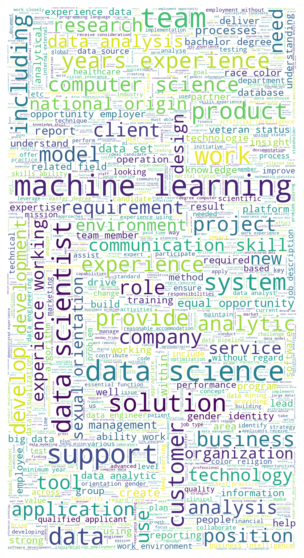

In [36]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [36]:
df.to_csv('eda_data.csv')